In [1]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import auc,roc_auc_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

In [2]:
dataset = pd.read_csv('Dev_Sample1.csv')

In [3]:
A = dataset.iloc[:,0:280]

In [4]:
A

,slno,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x270,x271,x272,x273,x274,x275,x276,x277,x278,x279
0,590029,0.0000,0.0155,0.0000,0.0018,0.0000,0.0292,0.0000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
1,73113,0.0000,0.0000,NaN,NaN,0.0000,0.0222,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,252913,0.0034,0.0034,NaN,NaN,0.0000,0.0040,NaN,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3,60723,0.0042,0.0090,NaN,NaN,0.0000,0.0126,NaN,1.0,1.0,...,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN
4,31946,-0.0069,-0.0069,NaN,NaN,0.0000,-0.0115,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,595199,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0219,0.0000,0.0,0.0,...,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN
6,590860,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0099,0.0000,0.0,0.0,...,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN
7,636277,-0.0047,-0.0047,NaN,NaN,0.0000,0.0379,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
8,610206,-0.0625,-0.0416,NaN,NaN,0.0000,-0.0672,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,258959,0.0000,0.0000,NaN,NaN,0.0000,0.0000,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
C=pd.DataFrame(A)

In [6]:
C

,slno,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x270,x271,x272,x273,x274,x275,x276,x277,x278,x279
0,590029,0.0000,0.0155,0.0000,0.0018,0.0000,0.0292,0.0000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
1,73113,0.0000,0.0000,NaN,NaN,0.0000,0.0222,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,252913,0.0034,0.0034,NaN,NaN,0.0000,0.0040,NaN,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3,60723,0.0042,0.0090,NaN,NaN,0.0000,0.0126,NaN,1.0,1.0,...,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN
4,31946,-0.0069,-0.0069,NaN,NaN,0.0000,-0.0115,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,595199,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0219,0.0000,0.0,0.0,...,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN
6,590860,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0099,0.0000,0.0,0.0,...,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN
7,636277,-0.0047,-0.0047,NaN,NaN,0.0000,0.0379,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
8,610206,-0.0625,-0.0416,NaN,NaN,0.0000,-0.0672,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,258959,0.0000,0.0000,NaN,NaN,0.0000,0.0000,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
c=C.fillna(C.mean())

In [8]:
X=c.values
X3=c.values
x_train=c.values
X9=c.values 

In [9]:
X = scale(X)

C:\Users\IN16\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:180: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [10]:
pca = PCA(n_components=40)

In [11]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [12]:
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (295020, 280)
transformed shape: (295020, 40)


In [13]:
var= pca.explained_variance_ratio_

In [14]:
var

array([0.03607801, 0.02530435, 0.02374771, 0.01838063, 0.01713483,
       0.0160187 , 0.0151751 , 0.01451258, 0.01363925, 0.01345646,
       0.01163432, 0.01155104, 0.01132008, 0.01100268, 0.01030158,
       0.00986035, 0.0095047 , 0.00945948, 0.0092862 , 0.00899735,
       0.00891846, 0.00878838, 0.00850154, 0.00837081, 0.00822552,
       0.00813586, 0.00791695, 0.0077836 , 0.00752568, 0.00735716,
       0.00729639, 0.00707019, 0.00698056, 0.00682627, 0.00675162,
       0.00667634, 0.00652962, 0.00647348, 0.00635963, 0.00626953])

In [15]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

In [16]:
print(var1)

[ 3.61  6.14  8.51 10.35 12.06 13.66 15.18 16.63 17.99 19.34 20.5  21.66
 22.79 23.89 24.92 25.91 26.86 27.81 28.74 29.64 30.53 31.41 32.26 33.1
 33.92 34.73 35.52 36.3  37.05 37.79 38.52 39.23 39.93 40.61 41.29 41.96
 42.61 43.26 43.9  44.53]


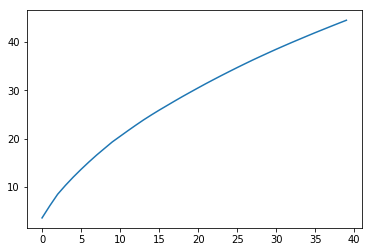

In [17]:
plt.plot(var1)

In [18]:
explained_variance=pca.explained_variance_
explained_variance_ratio=pca.explained_variance_ratio_
print("\n\nExplained Variance ",explained_variance)
print("\n\nExplained Variance Ratio  ", explained_variance_ratio)
print("\n\nCummulative Sum  ", np.cumsum(pca.explained_variance_))
 



Explained Variance  [9.99364348 7.0093281  6.57813803 5.091452   4.74636501 4.43719467
 4.20351736 4.01999963 3.77808376 3.72745169 3.2227181  3.19964892
 3.1356729  3.04775368 2.85354636 2.73132688 2.63280969 2.62028529
 2.57228729 2.49227447 2.47042121 2.43439081 2.35493353 2.31872138
 2.27847555 2.25363988 2.19300327 2.15606491 2.08462007 2.03794059
 2.02110697 1.95844969 1.93362049 1.89088436 1.87020375 1.8493526
 1.80871105 1.79315868 1.76162357 1.73666477]


Explained Variance Ratio   [0.03607801 0.02530435 0.02374771 0.01838063 0.01713483 0.0160187
 0.0151751  0.01451258 0.01363925 0.01345646 0.01163432 0.01155104
 0.01132008 0.01100268 0.01030158 0.00986035 0.0095047  0.00945948
 0.0092862  0.00899735 0.00891846 0.00878838 0.00850154 0.00837081
 0.00822552 0.00813586 0.00791695 0.0077836  0.00752568 0.00735716
 0.00729639 0.00707019 0.00698056 0.00682627 0.00675162 0.00667634
 0.00652962 0.00647348 0.00635963 0.00626953]


Cummulative Sum   [  9.99364348  17.00297158  23.5811

In [19]:
pca = PCA(n_components=28)
pca.fit(X)
X1=pca.fit_transform(X)

print(X1)

[[ 3.68758220e+00 -1.11199452e+00  1.09796656e+01 ...  5.92125735e-01
  -2.46286916e+00  4.49595383e-01]
 [-1.37064937e+00 -1.42641394e-01 -1.06611258e+00 ... -1.15967712e-04
   4.61672022e-01 -1.43629741e+00]
 [-1.08294469e+00  5.03561667e-02 -1.69824412e+00 ...  4.06144617e-01
   2.42265031e-01 -2.41182970e-01]
 ...
 [-6.18074140e-01 -8.13875217e-01  1.98910354e-01 ... -1.40955088e-01
  -2.86153274e-01  9.89640150e-01]
 [ 6.40046154e-01 -3.22657547e-01  1.39359619e+00 ... -4.96622093e+00
   1.61470315e+00  2.56591985e+00]
 [-3.72512665e-01 -7.66741672e-01  2.47116520e+00 ...  5.57674610e-01
  -4.82757837e-01 -1.31182141e-01]]


In [20]:
explained_variance=pca.explained_variance_
explained_variance_ratio=pca.explained_variance_ratio_
print("\n\nExplained Variance ",explained_variance)
print("\n\nExplained Variance Ratio  ", explained_variance_ratio)
print("\n\nCummulative Sum  ", np.cumsum(pca.explained_variance_))



Explained Variance  [9.99363693 7.00928844 6.57803923 5.08960115 4.74611451 4.43695605
 4.20171387 4.01897984 3.77539921 3.72671404 3.21409511 3.18269004
 3.13009133 3.04033013 2.84487943 2.71485618 2.62951068 2.5627898
 2.53583034 2.46446112 2.39878324 2.39273509 2.31240997 2.26909814
 2.24366912 2.16307238 2.14238711 2.11112618]


Explained Variance Ratio   [0.03607799 0.0253042  0.02374735 0.01837395 0.01713393 0.01601784
 0.01516859 0.0145089  0.01362955 0.0134538  0.01160319 0.01148982
 0.01129993 0.01097588 0.01027029 0.00980089 0.00949279 0.00925192
 0.00915459 0.00889694 0.00865984 0.008638   0.00834802 0.00819166
 0.00809986 0.0078089  0.00773422 0.00762137]


Cummulative Sum   [ 9.99363693 17.00292537 23.5809646  28.67056574 33.41668025 37.8536363
 42.05535017 46.07433001 49.84972922 53.57644326 56.79053838 59.97322842
 63.10331975 66.14364988 68.98852932 71.7033855  74.33289617 76.89568598
 79.43151631 81.89597743 84.29476068 86.68749577 88.99990574 91.26900388
 93.512673 

In [21]:
print(abs( pca.components_ ))

[[0.00167074 0.01592525 0.0211174  ... 0.02752682 0.02254938 0.03708735]
 [0.00116213 0.00206017 0.00278278 ... 0.06212402 0.04675783 0.08699277]
 [0.00189498 0.08422819 0.08693939 ... 0.02708605 0.02211661 0.0170973 ]
 ...
 [0.00360888 0.01336598 0.01174658 ... 0.07347075 0.08256235 0.07315256]
 [0.00361921 0.0201738  0.00231666 ... 0.00743059 0.00016146 0.00429042]
 [0.00391078 0.01982268 0.0385263  ... 0.00771666 0.01091678 0.01449546]]


In [22]:
y=dataset["y"]
y_train=dataset["y"]
#y2=dataset["y"]

In [23]:
weights=dataset["weight"]

In [24]:
#all 280 variables
model4 = LogisticRegression()
model4.fit(X3, y)
predicted_classes = model4.predict(X3)
accuracy = accuracy_score(y,predicted_classes,sample_weight=weights)
parameters = model4.coef_
'''print(parameters)'''
print(accuracy)

C:\Users\IN16\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\IN16\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9340944489864458


In [25]:
#PCA 28 components 
model1 = LogisticRegression()
model1.fit(X1, y,sample_weight=weights)
predicted_classes = model1.predict(X1)
accuracy = accuracy_score(y,predicted_classes,sample_weight=weights)
parameters = model1.coef_
'''print(parameters)'''
print(accuracy)

C:\Users\IN16\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9340894685824844


In [28]:
#PCA 40 components
model2 = LogisticRegression()
model2.fit(X, y)
y_pred = model2.predict(X)
auc = roc_auc_score(y, y_pred)
print(auc)

C:\Users\IN16\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5004872724459356


In [29]:
#PCA 28 components
model2 = LogisticRegression()
model2.fit(X1, y)
y_pred = model2.predict(X1)
auc = roc_auc_score(y, y_pred)
print(auc)

C:\Users\IN16\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5001127768171775


In [30]:
#PCA 28 components
X_train3, X_test3, y_train3, y_test3 = train_test_split(X1, y, test_size=0.2, random_state=0)
print(X_train3.shape, y_train3.shape)
print(X_test3.shape, y_test3.shape)

(236016, 28) (236016,)
(59004, 28) (59004,)


In [31]:
model6 = LogisticRegression()
#fit function
model6.fit(X_train3, y_train3)

C:\Users\IN16\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [32]:
y_pred3 = model6.predict(X_train3)
auc = roc_auc_score(y_pred3, y_train3)
print(auc)

0.5777405639419521


In [33]:
y_pred3 = model6.predict(X_test3)
auc = roc_auc_score(y_pred3, y_test3)
print(auc)

0.5532306179870504


In [34]:
count_1 = len(dataset[dataset['y']==1])
count_0 = len(dataset[dataset['y']==0])
pct_of_1 = count_1/(count_1+count_0)
print("percentage of 1 is", pct_of_1*100)
pct_of_0 = count_0/(count_1+count_0)
print("percentage of 0 is", pct_of_0*100)

percentage of 1 is 5.909429869161413
percentage of 0 is 94.09057013083859


In [35]:
model5 = LogisticRegression()
model5.fit(x_train, y_train)
y_pred = model5.predict(x_train)
auc = roc_auc_score(y_train, y_pred)
print(auc)

C:\Users\IN16\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\IN16\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5000429492345767


In [36]:
#all 280 variables
X_train2, X_test2, y_train2, y_test2 = train_test_split(X9, y, test_size=0.2, random_state=0)
print(X_train2.shape, y_train2.shape)
print(X_test2.shape, y_test2.shape)

(236016, 280) (236016,)
(59004, 280) (59004,)


In [37]:
model7 = LogisticRegression()
#fit function
model7.fit(X_train2, y_train2)

C:\Users\IN16\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\IN16\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [38]:
model7.coef_

array([[-3.45900494e-06, -3.96838042e-14, -8.86444570e-14,
        -8.04114927e-14, -1.39136951e-13, -7.85170552e-15,
        -1.01894137e-13, -2.35676221e-14, -8.41880473e-12,
        -4.73825915e-12, -1.07492952e-11, -4.26428054e-12,
        -6.53790871e-12, -1.99094662e-12, -2.01466980e-12,
        -8.20804515e-12, -1.08862289e-12, -3.01701895e-12,
        -7.58209656e-13, -9.23166417e-09, -3.60400011e-11,
         2.80380658e-14, -1.30019740e-10, -1.12498790e-06,
        -2.16098139e-13, -6.92396216e-12, -1.81507758e-10,
        -4.85053416e-11, -1.38285706e-12, -2.39425409e-11,
        -4.21694268e-12, -3.34091074e-12, -2.91577159e-12,
        -1.01818622e-10, -1.72368238e-13, -4.15023710e-11,
        -2.12248772e-10, -1.98085488e-08, -1.13048830e-12,
        -6.53013395e-11, -2.38670680e-13, -1.89735969e-06,
        -1.15632006e-10, -1.19658748e-09, -2.46493130e-14,
        -1.76586336e-14, -1.21175220e-13, -4.65379141e-14,
        -1.55389523e-06, -1.51368374e-14, -7.77835422e-1

In [39]:
y_pred = model7.predict(X_train2)
auc = roc_auc_score(y_pred, y_train2)
print(auc)

0.5705945909300838


In [40]:
y_pred = model7.predict(X_test2)
auc = roc_auc_score(y_pred, y_test2)
print(auc)

0.719899325446595


In [41]:
#Result summary for 28 components after performing PCA
logit = sm.Logit(y_train3,X_train3)

In [42]:
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.691455
         Iterations 4


In [43]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               236016
Model:                          Logit   Df Residuals:                   235988
Method:                           MLE   Df Model:                           27
Date:                Fri, 17 May 2019   Pseudo R-squ.:                  -2.091
Time:                        16:34:21   Log-Likelihood:            -1.6319e+05
converged:                       True   LL-Null:                       -52795.
                                        LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0031      0.001      2.415      0.016       0.001       0.006
x2            -0.0080      0.002     -5.005      0.000      -0.011      -0.005
x3             0.0101      0.002      6.235      0.0

In [44]:
 X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3,random_state=1)

In [45]:
from sklearn import svm

In [46]:
clf = svm.SVC(kernel='linear')

In [ ]:
clf.fit(X_train, y_train)